In [5]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train = True, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test =  datasets.MNIST("", train = False, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader(train, batch_size= 10, shuffle = True)
testset = torch.utils.data.DataLoader(train, batch_size= 10, shuffle = True)


In [6]:
import torch.nn as nn
import torch.nn.functional as F 

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64)# fc is fully connected
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)
        
        return x
        
        
net = Net()
print(net)
        
    

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
X = torch.rand((28,28))
X = X.view(1,28*28)
X

tensor([[0.5730, 0.5925, 0.7351, 0.3205, 0.1186, 0.1529, 0.9412, 0.6921, 0.0336,
         0.8244, 0.1237, 0.8518, 0.3948, 0.7652, 0.9549, 0.6930, 0.0212, 0.8658,
         0.7576, 0.5824, 0.2592, 0.0623, 0.5802, 0.1044, 0.5917, 0.2128, 0.9771,
         0.7994, 0.9880, 0.3988, 0.2010, 0.2300, 0.0235, 0.0330, 0.7596, 0.1475,
         0.3574, 0.5761, 0.3106, 0.9951, 0.3773, 0.2957, 0.0880, 0.2735, 0.0521,
         0.7190, 0.0245, 0.4835, 0.4020, 0.8678, 0.4082, 0.3048, 0.7310, 0.7642,
         0.4665, 0.9260, 0.9316, 0.3932, 0.7897, 0.0391, 0.4797, 0.3019, 0.9695,
         0.6737, 0.7238, 0.3050, 0.7889, 0.9688, 0.2184, 0.8626, 0.5174, 0.2072,
         0.7216, 0.1372, 0.8630, 0.0077, 0.7831, 0.9428, 0.7768, 0.0028, 0.3397,
         0.6889, 0.7832, 0.0338, 0.9042, 0.1507, 0.0954, 0.0186, 0.5228, 0.1703,
         0.8765, 0.6794, 0.7727, 0.8461, 0.3734, 0.3585, 0.5264, 0.1289, 0.0443,
         0.4084, 0.5275, 0.5002, 0.4695, 0.4656, 0.9433, 0.1772, 0.1949, 0.7622,
         0.0347, 0.3606, 0.4

In [35]:
output = net(X)
output

tensor([[-2.3192, -2.4110, -2.4151, -2.1682, -2.2570, -2.2495, -2.2272, -2.4674,
         -2.3223, -2.2314]], grad_fn=<LogSoftmaxBackward>)

In [9]:
#PART 4

In [11]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # datat is a batch of featuresets and labels
        X,y = data
        #everytime before you pass data through your neural network
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()#backprop
        optimizer.step()
    print(loss)
    

tensor(0.0027, grad_fn=<NllLossBackward>)
tensor(0.0222, grad_fn=<NllLossBackward>)
tensor(0.0005, grad_fn=<NllLossBackward>)


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y =data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", round(correct/total,3))
            

Accuracy: 0.989


<function matplotlib.pyplot.show(*args, **kw)>

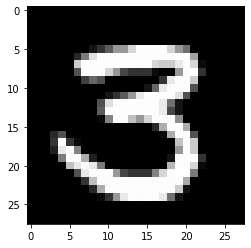

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X[9].view(28,28), cmap="gray")
plt.show

In [60]:
print(torch.argmax(net(X[9].view(-1,784))[0]))

tensor(6, grad_fn=<NotImplemented>)
